In [2]:
import os
base_dir = 'cat-and-dog'
#构造路径存储训练数据，校验数据以及测试数据
train_dir = os.path.join(base_dir, 'training_set')
os.makedirs(train_dir, exist_ok = True)
validation_dir = os.path.join(base_dir, 'validation_set')
os.makedirs(validation_dir, exist_ok = True)
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#我们来检查一下，看看每个分组（训练 / 验证 ）中分别包含多少张图像
print('total trainning cat images: ', len(os.listdir(train_cats_dir)))
print('total trainning dog images: ', len(os.listdir(train_dogs_dir)))
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))

total trainning cat images:  1500
total trainning dog images:  1500
total validation cat images:  500
total validation dog images:  500


In [3]:
from keras import layers
from keras import models
model = models.Sequential()
#输入图片大小是150*150 3表示图片像素用(R,G,B)表示
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150 , 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [4]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [4]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [5]:
from keras.preprocessing.image import ImageDataGenerator
#把像素点的值除以255，使之在0到1之间
train_datagen = ImageDataGenerator(rescale = 1./ 255)
test_datagen = ImageDataGenerator(rescale = 1. / 255)
#generator 实际上是将数据批量读入内存，使得代码能以for in 的方式去方便的访问
# 使用flow_from_directory()方法可以实例化一个针对图像batch的生成器
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150),#  # 将所有图像大小调整为150*150
    batch_size=20,
    class_mode = 'binary')#因为使用了binary_crossentropy损失，所以需要使用二进制标签
validation_generator = test_datagen.flow_from_directory(
    validation_dir,target_size = (150, 150),batch_size = 20,
    class_mode = 'binary')

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
train_history = model.fit_generator(train_generator, steps_per_epoch = 150,
                             epochs = 30, validation_data = validation_generator,
                                    verbose=2,validation_steps = 100)

Epoch 1/30
 - 492s - loss: 0.6898 - acc: 0.5470 - val_loss: 0.6718 - val_acc: 0.6240
Epoch 2/30
 - 496s - loss: 0.6577 - acc: 0.6160 - val_loss: 0.6321 - val_acc: 0.6480
Epoch 3/30
 - 480s - loss: 0.6160 - acc: 0.6507 - val_loss: 0.5908 - val_acc: 0.7000
Epoch 4/30
 - 466s - loss: 0.5744 - acc: 0.6907 - val_loss: 0.5554 - val_acc: 0.7100
Epoch 5/30
 - 463s - loss: 0.5344 - acc: 0.7270 - val_loss: 0.5309 - val_acc: 0.7400
Epoch 6/30
 - 502s - loss: 0.4954 - acc: 0.7573 - val_loss: 0.5541 - val_acc: 0.7120
Epoch 7/30
 - 525s - loss: 0.4756 - acc: 0.7713 - val_loss: 0.5011 - val_acc: 0.7700
Epoch 8/30
 - 526s - loss: 0.4464 - acc: 0.7927 - val_loss: 0.4895 - val_acc: 0.7910
Epoch 9/30
 - 487s - loss: 0.4172 - acc: 0.8080 - val_loss: 0.5310 - val_acc: 0.7500
Epoch 10/30
 - 477s - loss: 0.3927 - acc: 0.8263 - val_loss: 0.5462 - val_acc: 0.7310
Epoch 11/30
 - 465s - loss: 0.3636 - acc: 0.8350 - val_loss: 0.5642 - val_acc: 0.7310
Epoch 12/30
 - 495s - loss: 0.3442 - acc: 0.8573 - val_loss: 0.

In [7]:
try:
    model.save('cats_and_dogs_cnn.h5')
    print('保存模型成功！')
except:
    print('保存模型失败！')

保存模型成功！


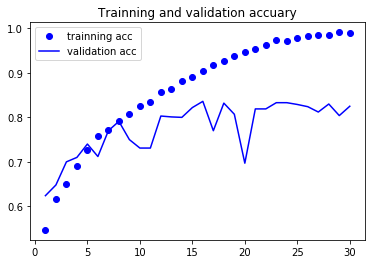

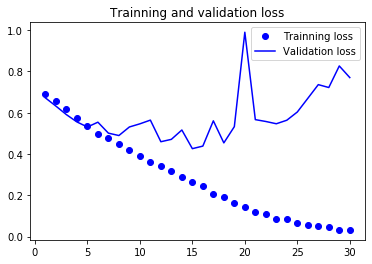

In [9]:
import matplotlib.pyplot as plt
acc = train_history.history['acc']
val_acc = train_history.history['val_acc']
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
epochs = range(1, len(acc) + 1)
#绘制模型对训练数据和校验数据判断的准确率
plt.plot(epochs, acc, 'bo', label = 'trainning acc')
plt.plot(epochs, val_acc, 'b', label = 'validation acc')
plt.title('Trainning and validation accuary')
plt.legend()
plt.show()
plt.figure()
#绘制模型对训练数据和校验数据判断的错误率
plt.plot(epochs, loss, 'bo', label = 'Trainning loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Trainning and validation loss')
plt.legend()
plt.show()